In [212]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px



In [213]:
df = pd.read_csv('filtered_nn_data.csv')

In [214]:
df.head()

,date,year,uv,buyer,gmv,orders,cr,day_of_week,weekday,day_type,day_binary,campaign_info,campaign_type
0,2021-01-01,2021,96281,3595,66052,4331,0.037,4,1,Weekday,100,non campaign,non-campaign
1,2021-01-02,2021,93620,3852,68483,4599,0.041,5,0,Weekend,101,non campaign,non-campaign
2,2021-01-03,2021,98196,4402,75556,5254,0.045,6,0,Weekend,110,non campaign,non-campaign
3,2021-01-04,2021,108903,4374,75432,5292,0.040,0,1,Weekday,0,non campaign,non-campaign
4,2021-01-05,2021,123715,4486,74678,5518,0.036,1,1,Weekday,1,non campaign,non-campaign


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           748 non-null    object 
 1   year           748 non-null    int64  
 2   uv             748 non-null    int64  
 3   buyer          748 non-null    int64  
 4   gmv            748 non-null    int64  
 5   orders         748 non-null    int64  
 6   cr             748 non-null    float64
 7   day_of_week    748 non-null    int64  
 8   weekday        748 non-null    int64  
 9   day_type       748 non-null    object 
 10  day_binary     748 non-null    int64  
 11  campaign_info  748 non-null    object 
 12  campaign_type  748 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 76.1+ KB


In [216]:
df = df[['date', 'uv', 'buyer', 'gmv', 'orders']].copy()

In [217]:
print(df)
df['date'] = pd.to_datetime(df['date'])
print(df.info())

df.set_index('date', inplace=True)

print(df.head())

           date      uv  buyer     gmv  orders
0    2021-01-01   96281   3595   66052    4331
1    2021-01-02   93620   3852   68483    4599
2    2021-01-03   98196   4402   75556    5254
3    2021-01-04  108903   4374   75432    5292
4    2021-01-05  123715   4486   74678    5518
..          ...     ...    ...     ...     ...
743  2023-08-18  208037   8153  106945    9768
744  2023-08-19  210176   8114  103039    9740
745  2023-08-20  209993   8518  110031   10201
746  2023-08-21  212682   8289  106126    9820
747  2023-08-22  211964   8399  107246    9974

[748 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    748 non-null    datetime64[ns]
 1   uv      748 non-null    int64         
 2   buyer   748 non-null    int64         
 3   gmv     748 non-null    int64         
 4   orders  748 non-null    int64         


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748 entries, 2021-01-01 to 2023-08-22
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   uv      748 non-null    int64
 1   buyer   748 non-null    int64
 2   gmv     748 non-null    int64
 3   orders  748 non-null    int64
dtypes: int64(4)
memory usage: 29.2 KB


In [221]:
df.tail()

,uv,buyer,gmv,orders
date,,,,
2023-08-18,208037,8153,106945,9768
2023-08-19,210176,8114,103039,9740
2023-08-20,209993,8518,110031,10201
2023-08-21,212682,8289,106126,9820
2023-08-22,211964,8399,107246,9974


                uv  buyer    gmv  orders
date                                    
2021-01-01   96281   3595  66052    4331
2021-01-02   93620   3852  68483    4599
2021-01-03   98196   4402  75556    5254
2021-01-04  108903   4374  75432    5292
2021-01-05  123715   4486  74678    5518
Root Mean Squared Error (RMSE): 289.8286978656437
Mean Squared Error (MSE): 84000.67410649458


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\da

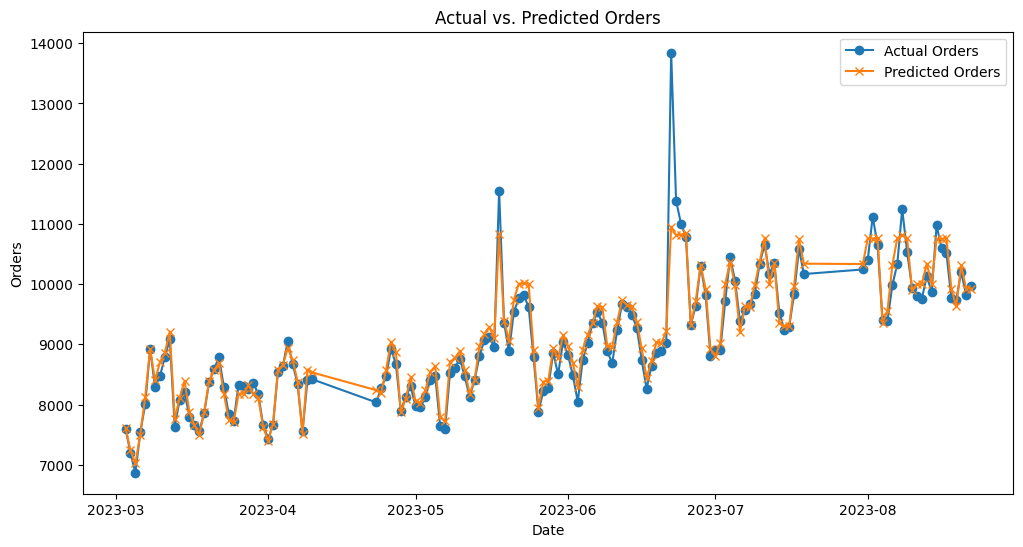

In [219]:
import 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
print(df.head())

# Define the features (regressors) and target variable
features = ['uv', 'buyer', 'gmv']
target = 'orders'

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
train_size = 0.8
split_index = int(len(df) * train_size)
train_data, test_data = df.iloc[:split_index], df.iloc[split_index:]

# Separate features and target variable for training and testing
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE (Root Mean Squared Error) to evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")

# Visualize the actual vs. predicted orders
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Actual Orders", marker='o')
plt.plot(test_data.index, y_pred, label="Predicted Orders", marker='x')
plt.xlabel("Date")
plt.ylabel("Orders")
plt.legend()
plt.title("Actual vs. Predicted Orders")
plt.show()


In [220]:

import xgboost as xgb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


print(df.head())


# Define the features (regressors) and target variable
features = ['uv', 'buyer', 'gmv']
target = 'orders'

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
train_size = 0.8
split_index = int(len(df) * train_size)
train_data, test_data = df.iloc[:split_index], df.iloc[split_index:]

# Separate features and target variable for training and testing
X_train, y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE (Root Mean Squared Error) to evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")

# Create a DataFrame for actual and predicted orders
result_df = pd.DataFrame({'Date': test_data.index, 'Actual Orders': y_test, 'Predicted Orders': y_pred})

# Create an interactive line chart with Plotly
fig = px.line(result_df, x='Date', y=['Actual Orders', 'Predicted Orders'], title='Actual vs. Predicted Orders')
fig.update_traces(mode='lines+markers')
fig.show()


                uv  buyer    gmv  orders
date                                    
2021-01-01   96281   3595  66052    4331
2021-01-02   93620   3852  68483    4599
2021-01-03   98196   4402  75556    5254
2021-01-04  108903   4374  75432    5292
2021-01-05  123715   4486  74678    5518
Root Mean Squared Error (RMSE): 289.8286978656437
Mean Squared Error (MSE): 84000.67410649458


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\da

In [222]:
import 

# Define the number of days for forecasting (2 years = 730 days)
forecast_days = 730

# Get the last date in your dataset
last_date = df.index[-1]

# Generate future dates for forecasting
future_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=forecast_days, freq='D')

# Create a DataFrame for future dates with placeholders for 'uv,' 'buyer,' and 'gmv'
future_df = pd.DataFrame({'date': future_dates})
future_df['uv'] =  # Fill in your estimated values for 'uv' for the future dates
future_df['buyer'] =  # Fill in your estimated values for 'buyer' for the future dates
future_df['gmv'] =  # Fill in your estimated values for 'gmv' for the future dates

# Set 'date' as the index
future_df.set_index('date', inplace=True)

# Use the trained XGBoost model to predict orders for the future
future_orders = model.predict(future_df[features])

# Create a DataFrame for the forecasted orders
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Orders': future_orders})

# Display the forecasted orders
print(forecast_df)


SyntaxError: invalid syntax (143864873.py, line 15)